# HABERMAN EXPLORATORY DATA ANALYSIS

#### This dataset mainly carries the details of the patients who undergoes the breast surgery due the breast cancer in between 1958 to 1970 and now we are going analyse some important outcomes from this data

In [1]:
!pwd #show current directory

/c/Users/ANKIT/practices/pandas practice


pwd: ignoring non-option arguments


In [3]:
# importing required libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
# reading the data using pandas
haber=pd.read_csv("haberman.csv")

In [3]:
haber.shape

(305, 4)

###### Here we can say that data has 4 different features or variables and 305 data points

In [6]:
# showing the features of data
haber.columns

Index(['age', 'year', 'nodes', 'status'], dtype='object')

###### so we can can say that features are age,year,nodes and status(either successfull surgery or not)

In [7]:
# showing the data points details
haber.info()
# there are details of total 305 patients

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 305 entries, 0 to 304
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   age     305 non-null    int64
 1   year    305 non-null    int64
 2   nodes   305 non-null    int64
 3   status  305 non-null    int64
dtypes: int64(4)
memory usage: 9.7 KB


#### Here we can say it contain details of total 305 patients which undergo health surgery

In [9]:
# showning first 10 and last 10 data points

haber.head(10)

# Here status-1 means survived and 2 means dead

,age,year,nodes,status
0,30,64,1,1
1,30,62,3,1
2,30,65,0,1
3,31,59,2,1
4,31,65,4,1
5,33,58,10,1
6,33,60,0,1
7,34,59,0,2
8,34,66,9,2
9,34,58,30,1


In [10]:
haber.tail(10)

,age,year,nodes,status
295,72,64,0,1
296,72,67,3,1
297,73,62,0,1
298,73,68,0,1
299,74,65,3,2
300,74,63,0,1
301,75,62,1,1
302,76,67,0,1
303,77,65,3,1
304,78,65,1,2


In [11]:
haber_survived=haber.loc[haber['status']==1]
haber_dead=haber.loc[haber['status']==2]

In [13]:
haber_survived.count()

age       225
year      225
nodes     225
status    225
dtype: int64

### Hence,we can say that there are total 225 survived patients after surgery

In [15]:
haber_dead.count()

age       80
year      80
nodes     80
status    80
dtype: int64

### Hence,we can say that there are total 80 patients dead

In [20]:
haber_survived.sort_values('age',ascending=False).head(10)

,age,year,nodes,status
303,77,65,3,1
302,76,67,0,1
301,75,62,1,1
300,74,63,0,1
298,73,68,0,1
297,73,62,0,1
296,72,67,3,1
295,72,64,0,1
294,72,58,0,1
292,71,68,2,1


In [22]:
haber['year'].value_counts()   #it shows that in which year how many operation are conducted

58    35
64    31
63    30
66    28
65    28
60    28
59    27
61    26
67    25
62    23
68    13
69    11
Name: year, dtype: int64

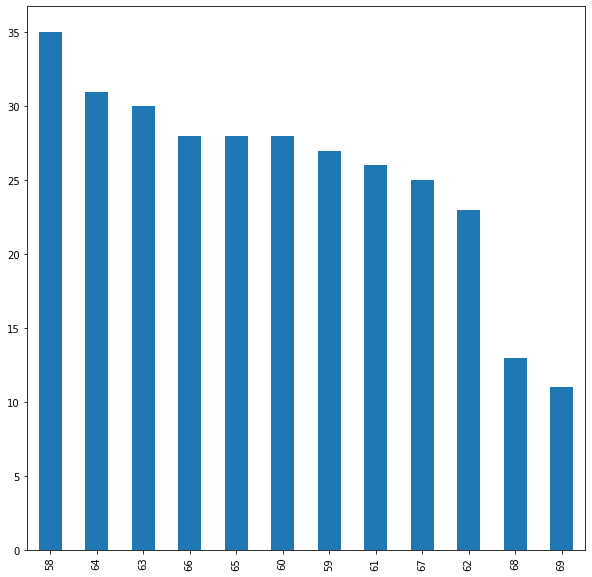

In [23]:
haber['year'].value_counts().plot(kind='bar',figsize=(10,10))

### From this bar graph we can conclude that the many operations were conducted in the year 1958 and least operation were conducted in year 1969

## Here the objective is clear that for a given age or feature we have to predict the status that either he is survived or Dead.......let's see

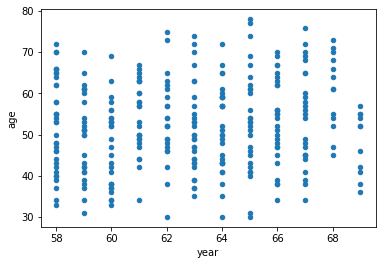

In [65]:
haber.plot(kind='scatter',x='year',y='age')
plt.show()

In [63]:
print(haber['age'].max())
print(haber['year'].max())

78
69


## From the above 2-D scatter plot it seems that every year operation were conducted but least in 1969

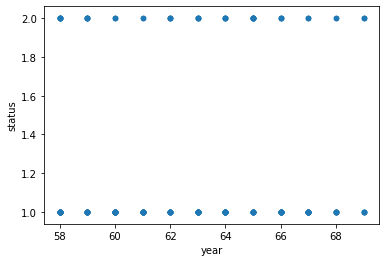

In [66]:
haber.plot(kind='scatter',x='year',y='status')
plt.show()

In [ ]:
## Plotting a pair plot will give better idea

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\axisgrid.py:243: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


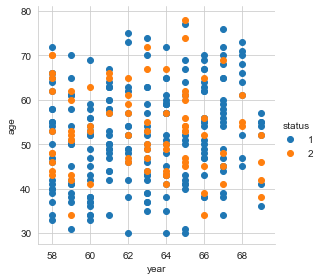

In [68]:
sns.set_style("whitegrid");
sns.FacetGrid(haber, hue="status", size=4) \
   .map(plt.scatter, "year", "age") \
   .add_legend();
plt.show();

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\axisgrid.py:2079: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


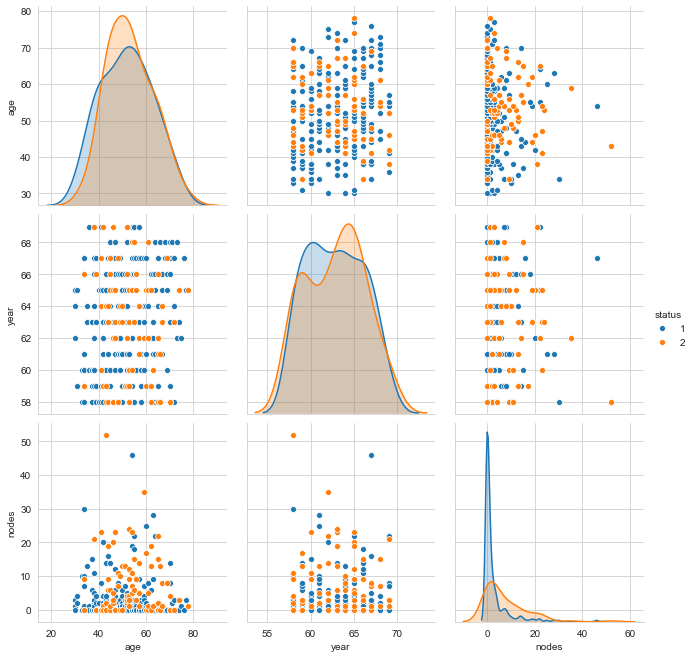

In [73]:
plt.close()
sns.set_style('whitegrid')
sns.pairplot(haber,hue='status',size=3)
plt.show()

#### Here we observe that plot between nodes v/s year can gives some rough idea about the survival rate in a particular year and year v/s age can also be taken into consideration.

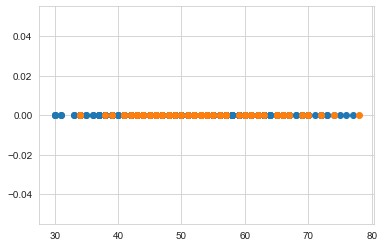

In [79]:
plt.plot(haber_survived["age"], np.zeros_like(haber_survived['age']), 'o')
plt.plot(haber_dead["age"], np.zeros_like(haber_dead['age']), 'o')
plt.show()
# considering a 1-D scatter plot

### here we can see that death rates are overlapping between age range 40-80.So,we can observe that age range between 40-80 at high risk from breast cancer but here most of the scene is not clear because age/node is factor or not

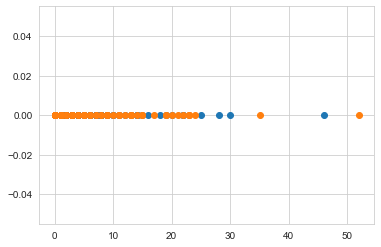

In [81]:
plt.plot(haber_survived["nodes"], np.zeros_like(haber_survived['nodes']), 'o')
plt.plot(haber_dead["nodes"], np.zeros_like(haber_dead['nodes']), 'o')
plt.show()
# considering a 1-D scatter plot

#### deaths rate are high between 0-26 we can observe

##### So we take age and node as a parameter for analysis

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\axisgrid.py:243: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


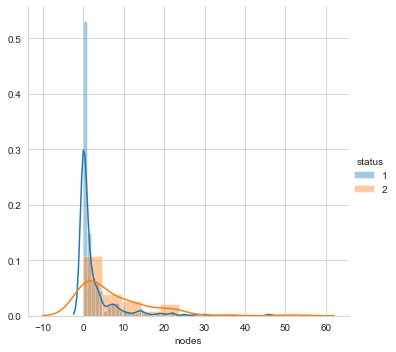

In [85]:
sns.FacetGrid(haber,hue='status',size=5).map(sns.distplot,"nodes").add_legend()
plt.show()

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\axisgrid.py:243: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


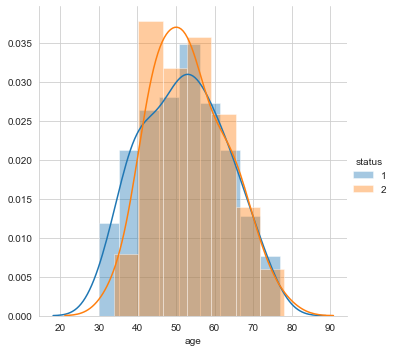

In [87]:
sns.FacetGrid(haber,hue='status',size=5).map(sns.distplot,"age").add_legend()
plt.show()

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\axisgrid.py:243: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


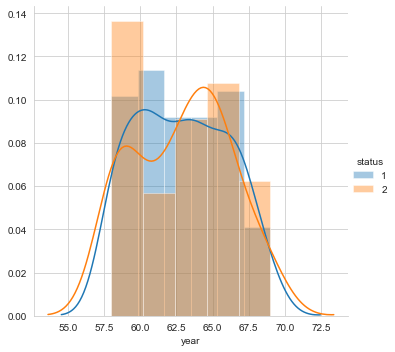

In [88]:
sns.FacetGrid(haber,hue='status',size=5).map(sns.distplot,"year").add_legend()
plt.show()

### Here the most clear histogram was nodes by which the survival and death rate seems to be separeted and we can make or observe a simple model.
concluded:-<br>
1.)node between -1 to 8 approximately were survived beacause graphs steeps were high.<br>
2.)Deaths between nodes 0-60 is common but mortality rate is slow.<br>
3.)from age histogram the deaths are there between age 40-80 around and survival is most common in between ages 30-60,it means that survival rates are higher than death rates when surgery is done within different age groups.<br>
4.)from year criteria more deaths was reported in year 1958 and low in 1960,may be due to less patient or medical advancement.

[0.05333333 0.10666667 0.12444444 0.09333333 0.16444444 0.16444444
 0.09333333 0.11111111 0.06222222 0.02666667]
[30.  34.7 39.4 44.1 48.8 53.5 58.2 62.9 67.6 72.3 77. ]


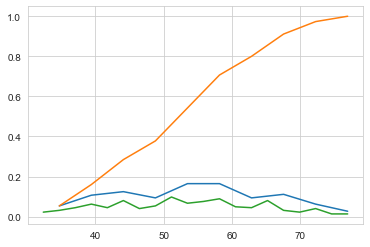

In [90]:
counts, bin_edges = np.histogram(haber_survived['age'], bins=10, 
                                 density = True)
pdf = counts/(sum(counts))
print(pdf);
print(bin_edges);
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf);
plt.plot(bin_edges[1:], cdf)


counts, bin_edges = np.histogram(haber_survived['age'], bins=20, 
                                 density = True)
pdf = counts/(sum(counts))
plt.plot(bin_edges[1:],pdf);

plt.show();

[0.05333333 0.10666667 0.12444444 0.09333333 0.16444444 0.16444444
 0.09333333 0.11111111 0.06222222 0.02666667]
[30.  34.7 39.4 44.1 48.8 53.5 58.2 62.9 67.6 72.3 77. ]


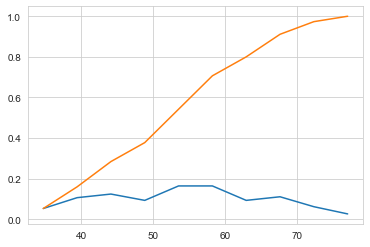

In [91]:
counts, bin_edges = np.histogram(haber_survived['age'], bins=10, 
                                 density = True)
pdf = counts/(sum(counts))
print(pdf);
print(bin_edges)

#compute CDF
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf)
plt.plot(bin_edges[1:], cdf)



plt.show();

[0.83555556 0.08       0.02222222 0.02666667 0.01777778 0.00444444
 0.00888889 0.         0.         0.00444444]
[ 0.   4.6  9.2 13.8 18.4 23.  27.6 32.2 36.8 41.4 46. ]


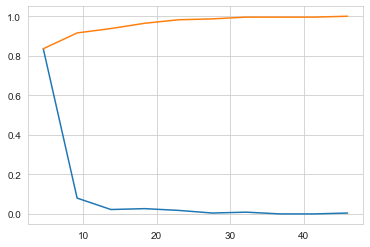

In [92]:
counts, bin_edges = np.histogram(haber_survived['nodes'], bins=10, 
                                 density = True)
pdf = counts/(sum(counts))
print(pdf);
print(bin_edges)

#compute CDF
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf)
plt.plot(bin_edges[1:], cdf)



plt.show();

### Here we can see that probability density function(PDF) and cumulative density function(CDF) of age is much more clearer than the PDF and CDF of nodes,furthur age is more valueable parameter for analysis here
concluded:-<br>
1)Around 90% of the patients survived which has age upto 70

[0.05333333 0.10666667 0.12444444 0.09333333 0.16444444 0.16444444
 0.09333333 0.11111111 0.06222222 0.02666667]
[30.  34.7 39.4 44.1 48.8 53.5 58.2 62.9 67.6 72.3 77. ]
[0.0375 0.075  0.2125 0.1125 0.2    0.1    0.0875 0.1125 0.0375 0.025 ]
[34.  38.4 42.8 47.2 51.6 56.  60.4 64.8 69.2 73.6 78. ]


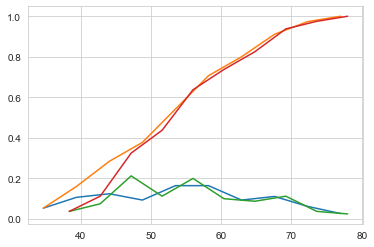

In [97]:
counts, bin_edges = np.histogram(haber_survived['age'], bins=10, 
                                 density = True)
pdf = counts/(sum(counts))
print(pdf);
print(bin_edges)
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf)
plt.plot(bin_edges[1:], cdf)


# dead
counts, bin_edges = np.histogram(haber_dead['age'], bins=10, 
                                 density = True)
pdf = counts/(sum(counts))
print(pdf);
print(bin_edges)
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf)
plt.plot(bin_edges[1:], cdf)


plt.show()

### Here we can see mixture of deaths and survival in the plot in almost all age groups

In [99]:
print("Means:")
print(np.mean(haber_survived["age"]))
print(np.mean(haber_dead["age"]))
print(np.mean(haber_survived["nodes"]))
print(np.mean(haber_dead["nodes"]))



Means:
52.01777777777778
53.3125
2.7911111111111113
7.525


#### Here we can see that average survival age is 52 and death age is 53(almost same)
#### Here we can see that average nodes for survival is 2.8 and death is 7.5

In [101]:
print("Deviations:")
print(np.std(haber_survived["age"]))
print(np.std(haber_dead["age"]))

print(np.std(haber_survived["nodes"]))
print(np.std(haber_dead["nodes"]))



Deviations:
10.98765547510051
9.617164018046068
5.857258449412131
9.165117293302908


#### Deviation means the spread or deviation from mean value(here survival deviation is 52+(-)10.9................

In [103]:
print("\nMedians:")
print(np.median(haber_survived["age"]))
print(np.median(haber_dead["age"]))


print("\nQuantiles:")
print(np.percentile(haber_survived["age"],np.arange(0, 100, 25)))
print(np.percentile(haber_dead["age"],np.arange(0, 100, 25)))


print("\n90th Percentiles:")
print(np.percentile(haber_survived["age"],90))
print(np.percentile(haber_dead["age"],90))


from statsmodels import robust
print ("\nMedian Absolute Deviation")
print(robust.mad(haber_survived["age"]))
print(robust.mad(haber_dead["age"]))



Medians:
52.0
53.0

Quantiles:
[30. 43. 52. 60.]
[34. 46. 53. 61.]

90th Percentiles:
67.0
66.10000000000001

Median Absolute Deviation
13.343419966550417
11.119516638792014


In [104]:
print("\nMedians:")
print(np.median(haber_survived["nodes"]))
print(np.median(haber_dead["nodes"]))


print("\nQuantiles:")
print(np.percentile(haber_survived["nodes"],np.arange(0, 100, 25)))
print(np.percentile(haber_dead["nodes"],np.arange(0, 100, 25)))


print("\n90th Percentiles:")
print(np.percentile(haber_survived["nodes"],90))
print(np.percentile(haber_dead["nodes"],90))


from statsmodels import robust
print ("\nMedian Absolute Deviation")
print(robust.mad(haber_survived["nodes"]))
print(robust.mad(haber_dead["nodes"]))



Medians:
0.0
4.0

Quantiles:
[0. 0. 0. 3.]
[ 0.    1.    4.   11.25]

90th Percentiles:
8.0
20.10000000000001

Median Absolute Deviation
0.0
5.930408874022408


#### From the node Value We Can see that 90% of the people survived which has nodes upto 8 
### and 90% of the people is died which has  node more than 8 and around 20's
##### So we can conclude that more number of nodes make patients critical to death and those having less nodes have more chances of survival

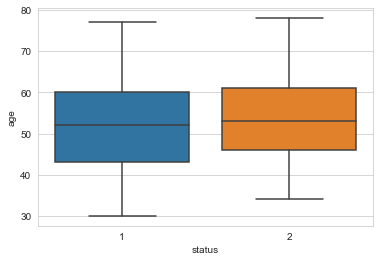

In [105]:
sns.boxplot(x='status',y='age', data=haber)
plt.show()

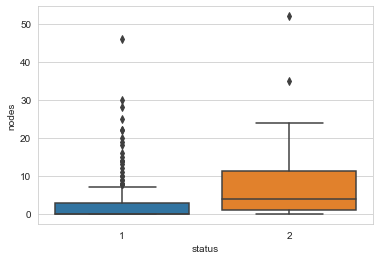

In [106]:
sns.boxplot(x='status',y='nodes', data=haber)
plt.show()

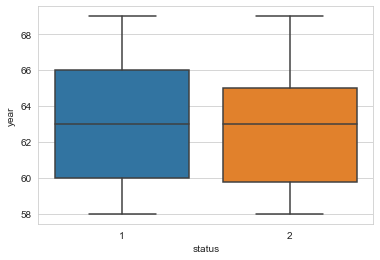

In [107]:
sns.boxplot(x='status',y='year', data=haber)
plt.show()

Boxplot mainly shows IQR (25th,75th,100th) percentile

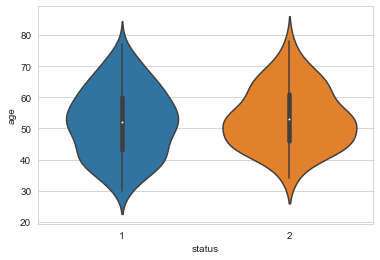

In [108]:
sns.violinplot(x="status", y="age", data=haber, size=8)
plt.show()

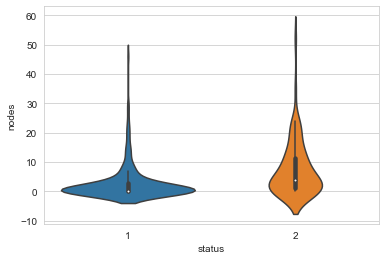

In [109]:
sns.violinplot(x="status", y="nodes", data=haber, size=8)
plt.show()

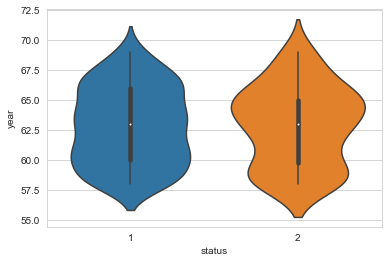

In [110]:
sns.violinplot(x="status", y="year", data=haber, size=8)
plt.show()

## Some Multivariate analysis

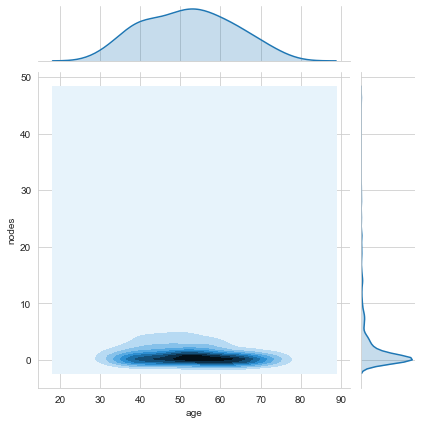

In [111]:
sns.jointplot(x="age", y="nodes", data=haber_survived, kind="kde");
plt.show();


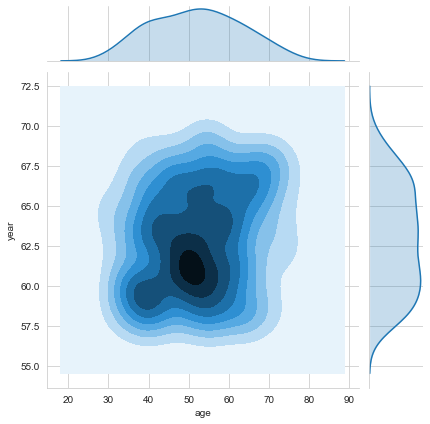

In [112]:
sns.jointplot(x="age", y="year", data=haber_survived, kind="kde");
plt.show();


In [117]:
print("total percentage of survival :-",(225/305)*100)
print("total percentage of death :-",(80/305)*100)


total percentage of survival :- 73.77049180327869
total percentage of death :- 26.229508196721312


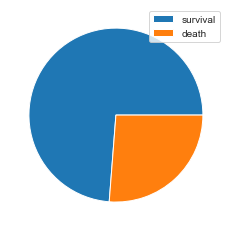

In [121]:
labels='survival','death'
a=((225/305)*100)
b=((80/305)*100)
calc=[a,b]
plt.pie(calc)
plt.legend(labels)
plt.show()


# Conclusions Drawn From Above Analysis:-

##### 1.There are Total 305 Patients in the data out of which 225 is survived and 80 is dead.<br>
##### 2.From the above analysis it is seen that most surgery were done in year 1958 and least in 1969.<br>
##### 3.Here Year only played an important role in terms of Number of Operations in my view.<br>
##### 4.I used mainly age,nodes feature of Patients to analyze the Trend.<br>
##### 5.we can see that patients with age group 40-80 having high risk of death but survival is also there,may be some medical advancement or other features matter.<br>
##### 6.we observe that patients with more axial positive nodes having high risk of death than negative axial nodes.<br>
##### 7.According to data of 305 patients death rates are high(80 deaths in 305 patients are somewhat high).<br>
##### 8.It means that total 73% patients has successful breast surgery and 27%  was not successfull inspite data is less.<br>
##### 9.Patients of High age group can even survive until the disease situation is critical.<br>
##### 10.Here,outlier Exists for nodes.<br>
##### 11.Median nodes for survived patients is 0 and 4.0 of dead(central value).
##### 12.Not most, but almost all who survived more than 5 years after surgery had maximum positive axil nodes about 7 to 8.<br>
##### 13.we can say that more positive nodes can increase risk of cancer as deaths are high.<br>
##### 14.it implies breast surgerys are not much useful. It only profits medical organisatons as they can perform surgeries on patients without cancer and the patient still survives.<br>
##### 15.I think it is somewhat imbalanced dataset.
##### 16.See percentiles,median value for more Clarification.<br>
### Here the main Points are cleared according to me.<br><br>
<h1 align="center">Thank You</h1>